<center><a href="#"><img src = "https://3d-media.pro/images/Logo-DATA-For-Developpement.png" width = 250, align = "center"></a></center>

# IMDB Review System

### Introduction

<p>In this project, we are going to create a model that will check the sentiment of a review that is provided to the world's biggest movie database system, and from that pattern we will predict if the movie is useful for the user, whether he/she/The person should watch it or not</>

## Data

### Data Exploration

In [25]:
# Installed first the requiments librairies with the requirements.txt file and import them
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rich.console import Console

# load dataset in data variable
data = pd.read_csv("dataset/IMDB Dataset.csv")

# Read the 5 first rows
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
# Read the 5 last rows
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [27]:
# Check-out the dimension of our dataset
data.shape

(50000, 2)

In [28]:
# the data types of each columns
data.dtypes

review       object
sentiment    object
dtype: object

In [29]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [31]:
# lets see whats the first 'review' is about
data["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [32]:
# the first 'sentiment' too
data["sentiment"][1]

'positive'

In [33]:
# another 'sentiment' 
data["sentiment"][7]

'negative'

### Check Missing Values

In [34]:
# Checking missing values 
data.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [35]:
# There is any missing value in our dataset?
data.isnull().values.any()

False

In [36]:
# Count missing value missing value in each columns ?
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### Data processing

In [37]:
# Add a new columns "sentiments"

data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)
data.head()

C:\Users\Cedric DJIVO\AppData\Local\Temp\ipykernel_6216\770538722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sentiment'].replace('positive',1,inplace=True)
C:\Users\Cedric DJIVO\AppData\Local\Temp\ipykernel_6216\770538722.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [38]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

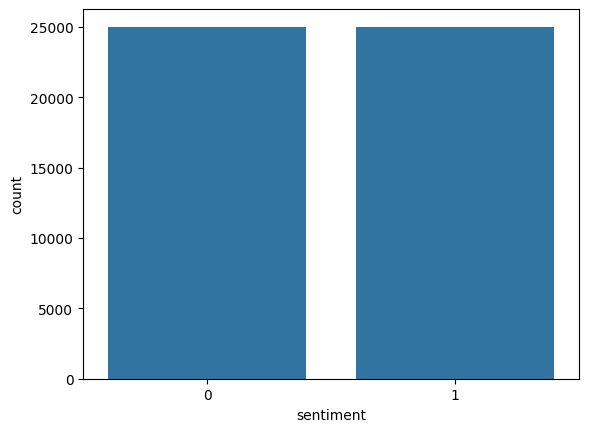

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment',data=data)

c:\Users\Cedric DJIVO\.conda\envs\IMDB\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='sentiment'>

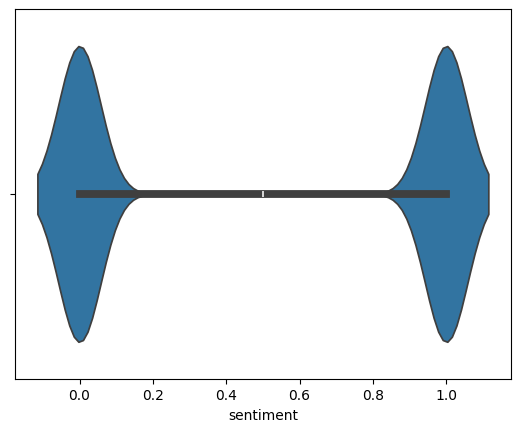

In [40]:
sns.violinplot(x='sentiment',data=data)

In [41]:
columns = []
for i in data.columns:
  columns.append(i)
print(columns)

['review', 'sentiment']


In [42]:
big = data['review'][0]
for i in data['review']:
  if len(i) > len(big):
    big = i
print(big)

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [43]:
small = data['review'][0]
for i in data['review']:
  if len(i) < len(small):
    small = i
print(small)

Read the book, forget the movie!


In [44]:
for i in range(len(data['review'])):
  if data["review"][i] == "Read the book, forget the movie!":
    print("The smallest review is at index ",i)


The smallest review is at index  27521


In [45]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [46]:
x = data["review"]
y = data["sentiment"]

y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [47]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [51]:
from keras.preprocessing.sequence import pad_sequences

encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing' (c:\Users\Cedric DJIVO\.conda\envs\IMDB\lib\site-packages\keras\preprocessing\__init__.py)

In [55]:
pip install keras.preprocessing.sequence

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.preprocessing.sequence (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.sequence


In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
